In [22]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from io import BytesIO
import base64
import random

def sparkline(data, figsize=(2, 0.5), **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwargs)
    ax.scatter(range(len(data)), data, alpha=0.5, edgecolors='blue')
    for k,v in ax.spines.items(): v.set_visible(False)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_ylim([min(data) - 0.25, max(data) + 0.25])
    img = BytesIO()
    plt.savefig(img, transparent=True)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

,col_A,col_B,col_scatters
0,C,0.302310,
1,C,0.181221,
2,A,0.576702,
3,C,0.700308,
4,B,0.179781,

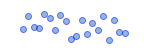
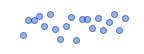
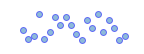
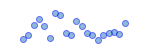
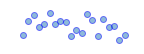

In [29]:

df = pd.DataFrame({
    'col_A': np.random.choice(['A', 'B', 'C'], 5),
    'col_B': np.random.random(size=(5, ))})
df.assign(col_scatters=pd.DataFrame(np.random.random(size=(20, 5))).apply(sparkline, figsize=(2, 0.75), axis=0).to_frame()).style